This code should reproduce the figures scene in the Data Analysis section of my paper.

In [1]:
from nuscenes import NuScenes
import open3d as o3d
import numpy as np

In [2]:
dataroot = '../core/data/datasets/nuscenes'
split = 'mini' #mini or trainval
nusc = NuScenes(version='v1.0-'+split, dataroot=dataroot, verbose=True)

Loading NuScenes tables for version v1.0-mini...
Loading nuScenes-lidarseg...
32 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
404 lidarseg,
Done loading in 0.527 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.


In [13]:
S = nusc.sample[92]

In [27]:
%%capture cap
nusc.render_sample(S['token'],
                   show_lidarseg=False)

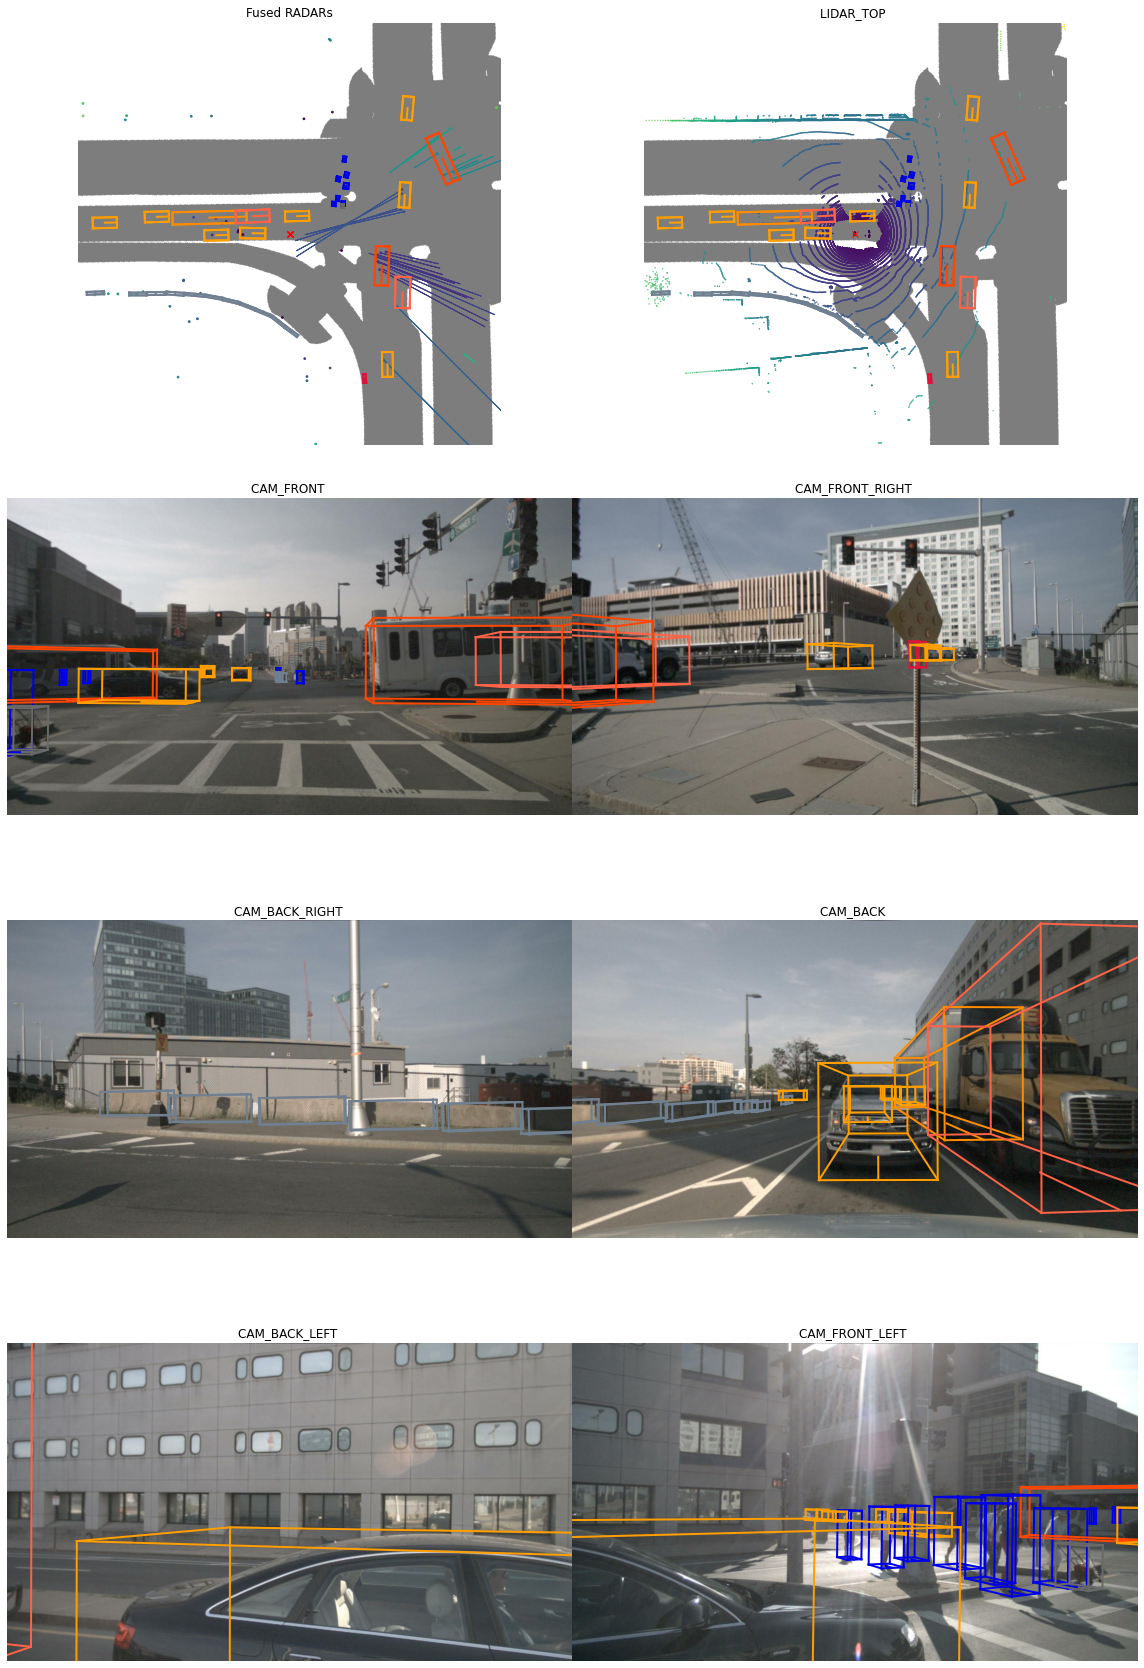

In [36]:
cap.show()

In [18]:
sample_data_token = S['data']['LIDAR_TOP']
data_path = nusc.get_sample_data_path(sample_data_token)
pc = np.fromfile(data_path, dtype=np.float32).reshape((-1,5))[:,:3]

In [19]:
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(pc)

In [20]:
o3d.visualization.draw_geometries([pcd])

In [25]:
vox1 = pcd.voxel_down_sample(0.05)
vox2 = pcd.voxel_down_sample(1)

In [26]:
o3d.visualization.draw_geometries([vox2])